## <span style="color:Orange">Sentiment Analysis of Movie Reviews (Logistic Regression)</span>

In [4]:
from sklearn.datasets import load_files
reviews_train = load_files("D:/Downloads/aclImdb/aclImdb/test/") 
# load_files returns a bunch, containing training texts and training labels
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))

type of text_train: <class 'list'>


In [7]:
print("length of text_train: {}".format(len(text_train)))

length of text_train: 25000


In [6]:
print("text_train[1]:\n{}".format(text_train[1]))

text_train[1]:
b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it would change and was quite disappointed that it continued in the same vein. I am so glad I did not spend the money to see this in a theater!'


In [8]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

#### The dataset was collected such that the positive class and the negative class balanced, so that there are as many positive as negative strings:

In [9]:
import numpy as np
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


#### We load the test dataset in the same manner:

In [10]:
reviews_test = load_files("D:/Downloads/aclImdb/aclImdb/train/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


### <span style="color:OrangeRed">Representing Text Data as a Bag of Words</span>

#### <span style="color:Magenta">Bag-of-Words for Movie Reviews</span>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x73822 sparse matrix of type '<class 'numpy.int64'>'
	with 3366134 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 73822
First 20 features:
['00', '000', '00000000000', '00000001', '000dm', '001', '0069', '007', '0079', '007s', '0083', '009', '00am', '00o', '00pm', '00s', '00schneider', '01', '0126', '0148']
Features 20010 to 20030:
['drought', 'drove', 'drover', 'droves', 'drowing', 'drown', 'drowned', 'drowning', 'drownings', 'drowns', 'drowsy', 'dru', 'drubbed', 'drubbing', 'drudge', 'drudgery', 'drudges', 'drudging', 'druedain', 'drug']
Every 2000th feature:
['00', 'afflicted', 'ardal', 'basket', 'boiled', 'calculating', 'chitty', 'congealed', 'cushioned', 'devoted', 'droplet', 'envogue', 'felled', 'frontline', 'gorman', 'header', 'hypnotism', 'intruments', 'kerchiefs', 'leos', 'malerie', 'microwaves', 'mutually', 'oedipus', 'pasts', 'polaroids', 'pushtun', 'remnar', 'runner', 'sentencing', 'slips', 'starkly', 'swiches', 'tings', 'ulloa', 'venice', 'widen']


#### Let’s start by evaluating LogisticRegression using cross-validation:

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Mean cross-validation accuracy: 0.89


C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### We obtain a mean cross-validation score of 89%, which indicates reasonable performance for a balanced binary classification task. We know that LogisticRegression has a regularization parameter, C, which we can tune via cross-validation:

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### We obtain a cross-validation score of 89% using `C=0.1`. We can now assess the generalization performance of this parameter setting on the test set:

In [15]:
X_test = vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test, y_test)))

0.88


In [16]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x26749 sparse matrix of type '<class 'numpy.int64'>'
	with 3289577 stored elements in Compressed Sparse Row format>


#### By requiring at least five appearances of each token, we can bring down the number of features to 27,271, as seen in the preceding output—only about a third of the original features. Let’s look at some tokens again:

In [17]:
feature_names = vect.get_feature_names()

print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '105', '107', '108', '109', '10th', '11', '110', '111', '116', '117', '11th', '12', '120', '125', '12th', '13', '130', '13th', '14', '140', '14th', '15', '150', '1500', '15th', '16', '16mm', '16s', '16th', '17', '170', '1700']
Features 20010 to 20030:
['riddler', 'riddles', 'ride', 'rider', 'riders', 'rides', 'ridge', 'ridgemont', 'ridges', 'ridicule', 'ridiculed', 'ridicules', 'ridiculous', 'ridiculously', 'ridiculousness', 'riding', 'ridley', 'riefenstahl', 'rife', 'riff']
Every 700th feature:
['00', 'affiliates', 'arbitrary', 'baritone', 'boats', 'caddy', 'childless', 'completist', 'crazily', 'delinquents', 'distinguishable', 'egged', 'exceptionally', 'fink', 'gain', 'grimace', 'hesitate', 'immune', 'invasions', 'king', 'lips', 'marthy', 'mistaking', 'netherworld', 'othello', 'permeate', 'pratfall', 'quip', 'renant', 'rotund', 'selfless', 'skilled

In [18]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best cross-validation score: 0.89


C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### The best validation accuracy of the grid search is still 89%, unchanged from before. We didn’t improve our model, but having fewer features to deal with speeds up processing and throwing away useless features might make the model more interpretable.

### <span style="color:OrangeRed">Stopwords</span>

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['meanwhile', 'are', 'when', 'by', 'sometime', 'nothing', 'again', 'thin', 'enough', 'whereas', 'several', 'i', 'first', 'detail', 'eight', 'whither', 'another', 'ie', 'twenty', 'sincere', 'yours', 'nobody', 'it', 'beyond', 'could', 'perhaps', 'may', 'five', 'where', 'whether', 'somewhere', 'done']


In [20]:
# Specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26445 sparse matrix of type '<class 'numpy.int64'>'
	with 2101629 stored elements in Compressed Sparse Row format>


#### There are now 305 (27,271–26,966) fewer features in the dataset, which means that most, but not all, of the stopwords appeared. Let’s run the grid search again:

In [21]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best cross-validation score: 0.89


C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <span style="color:OrangeRed">Rescaling the Data with tf–idf</span>

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roshini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Best cross-validation score: 0.90


## Rescaling data with TF-IDF


In [23]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000
)

word_vectorizer.fit(text_train)

tfidf_train = word_vectorizer.transform(text_train)
tfidf_test = word_vectorizer.transform(text_test)

In [59]:
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)

Shape of tfidf_train: (25000, 10000)
Shape of tfidf_test: (25000, 10000)


In [86]:
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of y_train: (25000,)
Shape of y_test: (25000,)


## Logistic Regression with TF-IDF 
- Calculate Confusion Matrix
- Calculate Accuracy, Recall, Precision, F1-score
- Plot ROC curve

In [136]:
def metrics(model,x,y):
    y_pred = model.predict(x)

    acc = accuracy_score(y, y_pred)
    print("\nAccuracy: ",round(acc,2))    
    print(classification_report(y, y_pred))
    acc = accuracy_score(y, y_pred)
    
    cm=confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
    disp.plot()


In [129]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve



Accuracy:  0.89
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



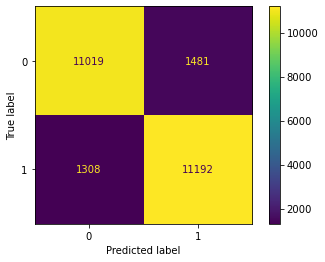

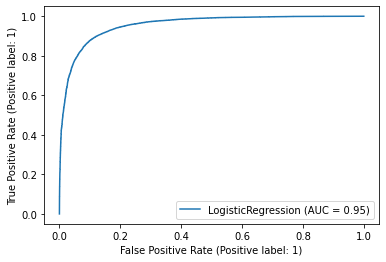

In [137]:
classifier = LogisticRegression()
classifier.fit(tfidf_train, y_train)
metrics(classifier,tfidf_test,y_test)
plot_roc_curve(classifier,tfidf_test,y_test)


## Guassian with TF-IDF
- Calculate Confusion Matrix
- Calculate Accuracy, Recall, Precision, F1-score



Accuracy:  0.81
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12500
           1       0.81      0.80      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



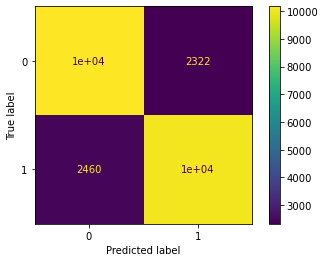

In [138]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

Xtfidf = tfidf_train.toarray()
Ytfidf = tfidf_test.toarray()
model.fit(Xtfidf, y_train)
metrics(model,Ytfidf,y_test)

## MultinomialNB with TF-IDF
- Calculate Confusion Matrix
- Calculate Accuracy, Recall, Precision, F1-score


Accuracy:  0.86
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     12500
           1       0.85      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



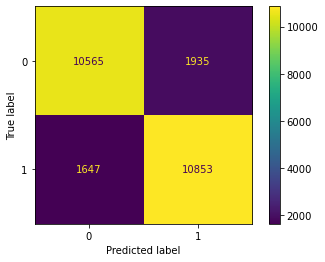

In [139]:
from sklearn.naive_bayes import MultinomialNB


model= MultinomialNB()


model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)

## Support Vector Machines(SVM) with TF-IDF
- Grid Search with 'param_grid' = {'svc_C': [1,5,10,50]}, svc_gamma : [0.0001,0.0005,0.001,0.005]
- print cross validation score and best parameters
- Calculate Confusion Matrix
- Calculate Accuracy, Recall, Precision, F1-score
- Plot ROC curve

In [117]:
from sklearn.svm import SVC
param_grid = {'C': [1,5,10,50],'gamma' : [0.0001,0.0005,0.001,0.005]}


In [124]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [126]:
gridsvc = GridSearchCV(SVC(), param_grid, cv=5)
gridsvc.fit(tfidf_train, y_train)
metrics(gridsvc,tfidf_test,y_test)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

KeyboardInterrupt: 

## Random Forest with TF-IDF
- Calculate Confusion Matrix
- Calculate Accuracy, Recall, Precision, F1-score
- Plot ROC curve


Accuracy:  0.85
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



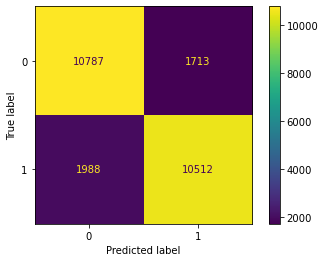

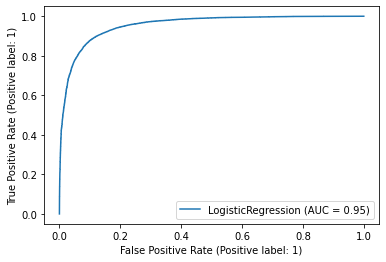

In [140]:
from sklearn.ensemble import RandomForestClassifier as rfm

model= rfm()

model.fit(tfidf_train, y_train)
metrics(model,tfidf_test,y_test)
plot_roc_curve(classifier,tfidf_test,y_test)


## Discussion

It is now safe to summarize the accuracy scores of all models and choose the best model not only depending on the accuracy score but also on various different metrics. We should also take into consideration how computationally expensive some models can be. 
- Logistic Regression:  Accuracy Score- 0.89 AUC= 0.95
- SVC: Accuracy Score- 
- GaussianNB: Accuracy Score- 0.81
- MultinomialNB: Accuracy Score- 0.86
- Random Forest: Accuracy Score- 0.85 AUC= 0.93

Logistic regression model was the least computationally expensive and had the best score. 
